Equation 1 from the lab manual:
spiral arm equation in polar coordinates

$R_\text{arm} = R_0 e^{\kappa(\phi - \phi_0)}$

$\ln R_\text{arm} = \ln R_0 + \kappa(\phi - \phi_0)$

$\ln R_\text{arm} = \ln R_0 + \kappa \phi - \kappa \phi_0$

$y = \ln R_\text{arm}$,

$x = \phi$,

$m = \kappa$,

$b = \ln R_0 - \kappa \phi_0$

Not relevant:

$\kappa \phi = \ln R_\text{arm} - \ln R_0 + \kappa \phi_0$

$\phi = \ln (\frac{R_\text{arm}}{R_0}) \,  / \,  \kappa + \phi_0$

$\phi = \alpha + \phi_0$

where $\alpha \equiv \ln (\frac{R_\text{arm}}{R_0}) / \kappa$

Equation 8 from the lab manual:

$V_\text{Dopp} = [\frac{V(R)}{R} - \frac{V(R_\odot)}{R_\odot}] R_\odot \sin(\ell)$

at the solar circle, $V(R_\odot) \approx 220$ km / s and $R_\odot \approx 8.5$ kpc.

In [1]:
# I wanted to do %matplotlib notebook for interactivity
# but for some reason all the plots disappear.
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


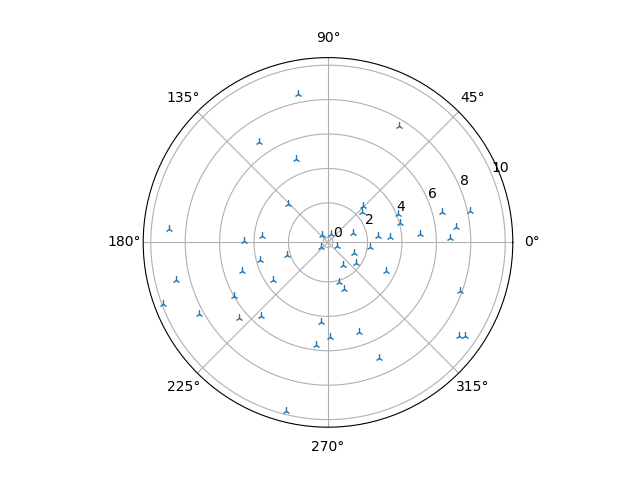

In [2]:
phi_random = np.random.rand(50) * 360
r_random = np.random.rand(50) * 10
plt.polar(phi_random, r_random, marker="2", linestyle="None")

<IPython.core.display.Javascript object>


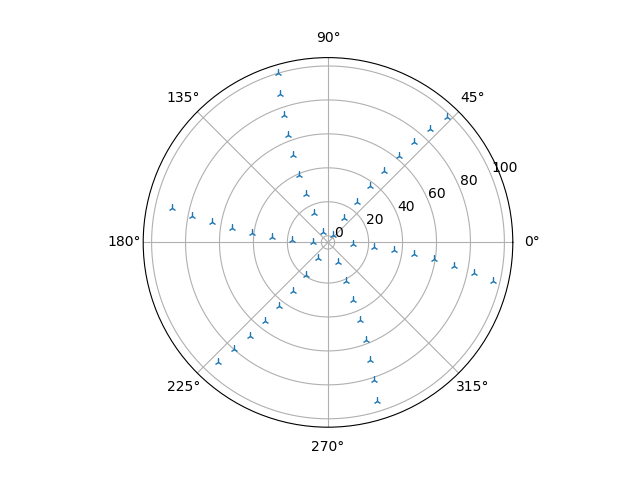

In [3]:
phi_even = np.linspace(1, 360, 50)
r_even = np.linspace(1, 100, 50)
plt.polar(phi_even, r_even, marker="2", linestyle="None")

In [4]:
even_fit = np.polyfit(phi_even, np.log(r_even), 1, full=False)
#square_sum = sum(even_fit[1] ** 2)
#print('Sum of squares:', square_sum)

In [5]:
kappa = even_fit[0]
offset = even_fit[1]
print('Automatic fit found:')
print('Tangent of pitch angle = ' + str(kappa))
print('Radial offset and phase term = ' + str(offset))

Automatic fit found:
Tangent of pitch angle = 0.008082435964405823
Radial offset and phase term = 2.1627629206082277


In [6]:
y = kappa * phi_even + offset
predicted = np.exp(y)

<IPython.core.display.Javascript object>


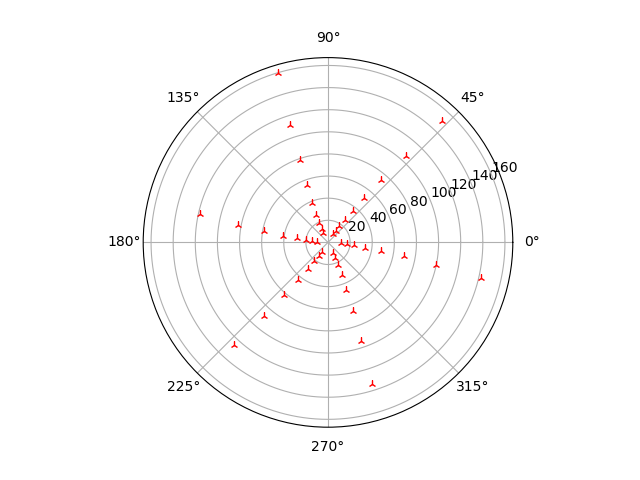

In [7]:
plt.polar(phi_even, predicted, marker="2", color="red", linestyle="None")

<IPython.core.display.Javascript object>


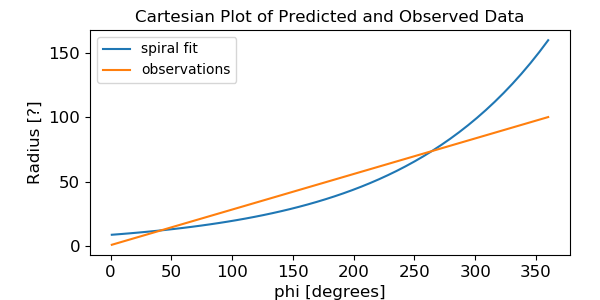

In [18]:
# Suggestions on how to show error bars on a polar plot?
# Current plan is to just use Cartesian
fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=.15, bottom=.15, right=.95, top=.9)
ax = fig.add_subplot(111)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

ax.plot(phi_even, predicted, label='spiral fit')
ax.plot(phi_even, r_even, label='observations')

plt.xlabel('phi [degrees]', fontsize=12)
plt.ylabel('Radius [?]', fontsize=12)
plt.title('Cartesian Plot of Predicted and Observed Radii')

ax.legend(loc='upper left')

<IPython.core.display.Javascript object>


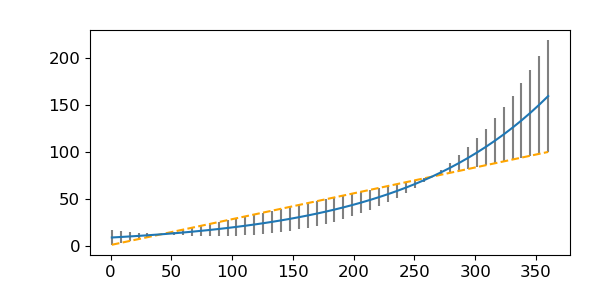

In [20]:
# The question is, which is error and which is discrepancy?
fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=.15, bottom=.15, right=.95, top=.9)
ax = fig.add_subplot(111)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

ax.errorbar(phi_even, predicted, r_even - predicted, ecolor='gray', label='predictions')
ax.plot(phi_even, r_even, color='orange', linestyle='dashed', label='observed')

plt.xlabel('phi [degrees]', fontsize=12)
plt.ylabel('Radius [?]', fontsize=12)
plt.title('Error Bars for Predicted Radii')

ax.legend(loc='upper left')

In [10]:
# This is probably not helpful with neither a scale nor point of reference.
sum_squares = sum((r_even - predicted) ** 2)
print('Sum of squares:', sum_squares)

Sum of squares: 16343.96396350076
